In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
import os
import sklearn
from joblib import dump,load

In [46]:
#Read the file and save as data frame
data = pd.read_csv('kc_house_data.csv')

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  int64  
 9   view           21597 non-null  int64  
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  int64  
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  int64  
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [48]:
#To check the presence of null values
data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

<Figure size 864x576 with 0 Axes>

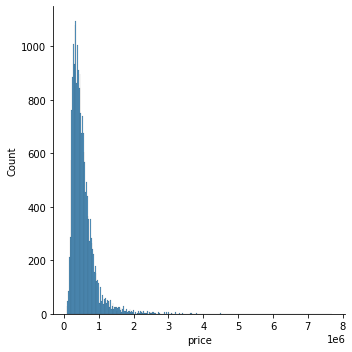

In [49]:
plt.figure(figsize=(12,8))
sns.displot(data['price'])

In [50]:
#Log Transformation of Price column to remove right skewness and become normally distributed. Done to remove effect of outliers.
#data['log_price'] = np.log(data.price)
#sns.displot(data['log_price'])
#plt.show()

In [51]:
#Remove features that are not required for training
#data = data.drop('id',axis = 1)
#data = data.drop('date',axis = 1)

In [52]:
data.shape

(21597, 21)

In [53]:
#data.yr_built = data.yr_built.astype(str)
#data.yr_renovated = data.yr_renovated.astype(str)

/Users/spandanatammineedi/Desktop/Anaconda/anaconda3/envs/str/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bedrooms', ylabel='count'>

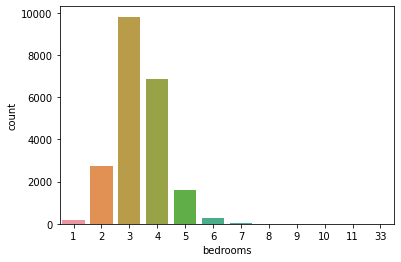

In [54]:
sns.countplot(data['bedrooms'])

/Users/spandanatammineedi/Desktop/Anaconda/anaconda3/envs/str/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bathrooms', ylabel='count'>

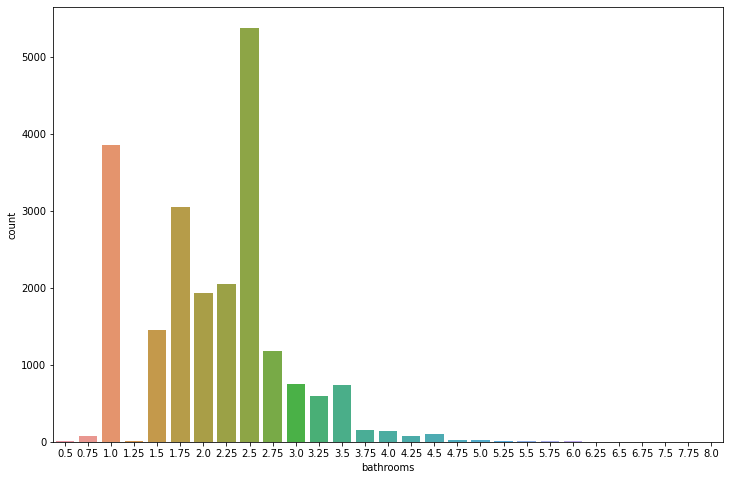

In [55]:
plt.figure(figsize=(12,8))
sns.countplot(data['bathrooms'])

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

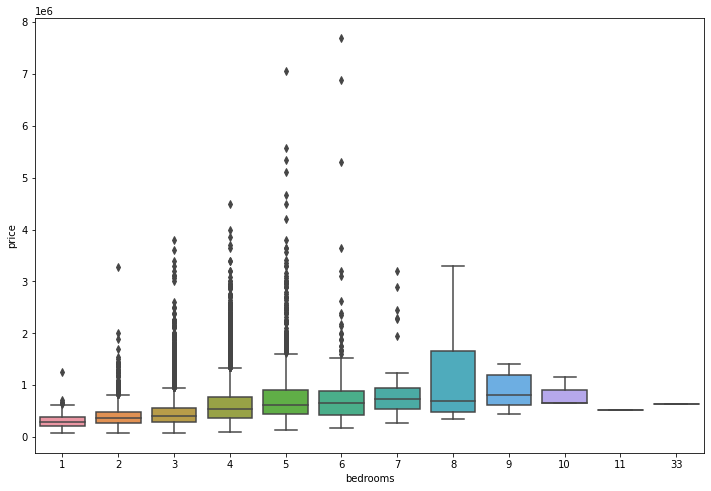

In [56]:
plt.figure(figsize=(12,8))
sns.boxplot(x='bedrooms',y='price',data=data)

<AxesSubplot:xlabel='waterfront', ylabel='price'>

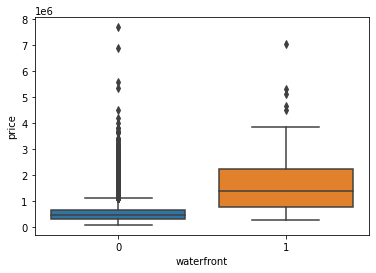

In [57]:
sns.boxplot(x='waterfront',y='price',data=data)

In [79]:
data['yr_renovated'].unique()

array([   0, 1991, 2002, 2010, 1999, 1992, 2013, 1994, 1978, 2005, 2008,
       2003, 1984, 1954, 2014, 2011, 1974, 1983, 1945, 1990, 1988, 1957,
       1977, 1981, 1995, 2000, 1998, 1970, 1989, 2004, 1986, 2009, 2007,
       1987, 1973, 2006, 1985, 2001, 1980, 1971, 1979, 1997, 1950, 1969,
       1948, 2015, 1968, 2012, 1963, 1951, 1993, 1962, 1996, 1972, 1953,
       1955, 1982, 1956, 1940, 1976, 1946, 1975, 1958, 1964, 1959, 1960,
       1967, 1965, 1934, 1944])

<AxesSubplot:>

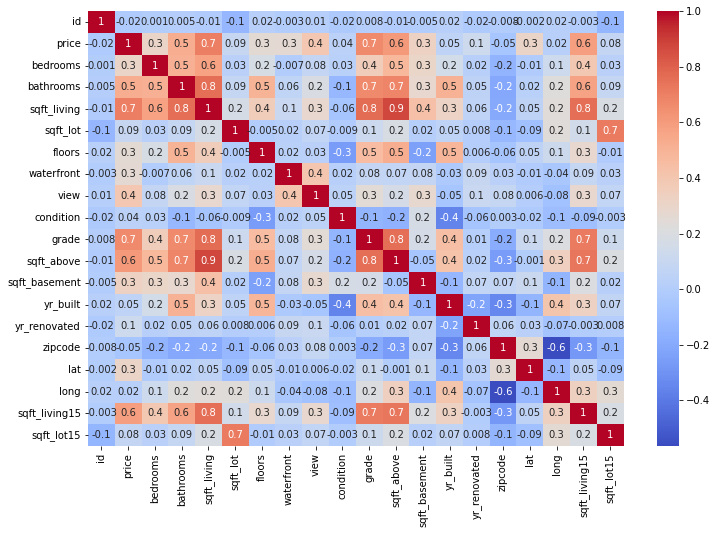

In [58]:
#Correlation
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(),annot = True, fmt = '.1g', cmap = 'coolwarm')

In [59]:
data = data.drop(['id','date','zipcode','sqft_lot','sqft_above','sqft_lot15','sqft_living15'],axis=1)

In [60]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,lat,long
count,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.494096,0.007547,0.234292,3.409825,7.657915,291.725008,1970.999676,84.464787,47.560093,-122.213982
std,3.673681e+05,0.926299,0.768984,918.106125,0.539683,0.086549,0.766390,0.650546,1.173200,442.667800,29.375234,401.821438,0.138552,0.140724
min,7.800000e+04,1.000000,0.500000,370.000000,1.000000,0.000000,0.000000,1.000000,3.000000,0.000000,1900.000000,0.000000,47.155900,-122.519000
25%,3.220000e+05,3.000000,1.750000,1430.000000,1.000000,0.000000,0.000000,3.000000,7.000000,0.000000,1951.000000,0.000000,47.471100,-122.328000
50%,4.500000e+05,3.000000,2.250000,1910.000000,1.500000,0.000000,0.000000,3.000000,7.000000,0.000000,1975.000000,0.000000,47.571800,-122.231000
75%,6.450000e+05,4.000000,2.500000,2550.000000,2.000000,0.000000,0.000000,4.000000,8.000000,560.000000,1997.000000,0.000000,47.678000,-122.125000
max,7.700000e+06,33.000000,8.000000,13540.000000,3.500000,1.000000,4.000000,5.000000,13.000000,4820.000000,2015.000000,2015.000000,47.777600,-121.315000


## TRAIN TEST SPLIT

In [61]:
X = data.drop(['price'],axis=1)
y = data['price']

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [64]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       21597 non-null  int64  
 1   bathrooms      21597 non-null  float64
 2   sqft_living    21597 non-null  int64  
 3   floors         21597 non-null  float64
 4   waterfront     21597 non-null  int64  
 5   view           21597 non-null  int64  
 6   condition      21597 non-null  int64  
 7   grade          21597 non-null  int64  
 8   sqft_basement  21597 non-null  int64  
 9   yr_built       21597 non-null  int64  
 10  yr_renovated   21597 non-null  int64  
 11  lat            21597 non-null  float64
 12  long           21597 non-null  float64
dtypes: float64(4), int64(9)
memory usage: 2.1 MB


## SCALING

In [65]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [66]:
X_test.shape

(6480, 13)

In [67]:
X_train.shape

(15117, 13)

## MACHINE LEARNING MODEL

## GRADIENT BOOST

In [68]:
from sklearn.ensemble import GradientBoostingRegressor

In [69]:
GB = GradientBoostingRegressor(learning_rate = 0.02, subsample = 0.5, n_estimators = 1500, max_depth = 6)
GB.fit(X_train,y_train)

GradientBoostingRegressor(learning_rate=0.02, max_depth=6, n_estimators=1500,
                          subsample=0.5)

In [70]:
GB_predictions = GB.predict(X_test)

In [71]:
from sklearn import metrics

In [75]:
metrics.explained_variance_score(y_test,GB_predictions)

0.8936403379438042

EXP:
    
0.904 - All features without ID, Zipcode
0.89  - No ID, Zipcode, Condition, Sqftlot_15
0.899 - No ID, Zipcode, Condition, Sqftlot_15, sqftliving_15
0.904 - No ID, Zipcode, Sqftlot_15, sqftliving_15,sqft_above

In [76]:
import joblib
joblib.dump(GB,'Data/model.jlib')

['Data/model.jlib']

In [29]:
import pickle
pickle.dump(GB,open('Data/model.pkl','wb'))